In [1]:
import pandas as pd

#### Merging 12 months of sales data into a single file

In [2]:
df = pd.read_csv('./Sales_Data/Sales_April_2019.csv')

df.head()
print(df.shape)

(18383, 6)


In [3]:
import os

files = [file for file in os.listdir('./Sales_Data')]

for file in files:
    print(file)

Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [4]:
all_month_data=pd.DataFrame()

In [5]:
for file in files:
    df = pd.read_csv('./Sales_Data/'+file)
    all_month_data = pd.concat([all_month_data,df])

In [6]:
all_month_data.shape

(186850, 6)

In [7]:
all_month_data.to_csv('all_month_data.csv',index=True)

#### Read the compiled updated data

In [8]:
data=pd.read_csv('all_month_data.csv')

In [9]:
data.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,1,NaN,NaN,NaN,NaN,NaN,NaN
2,2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


#### Cleaning the Data And making it ready for analysis

In [10]:
 data.shape

(186850, 7)

In [11]:
data.isnull().sum()

Unnamed: 0            0
Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [12]:
#dropping the the columns which are not required
data.drop(['Unnamed: 0'], axis=1)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [13]:
#dropping null values
data=data.dropna()

In [14]:
data.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [15]:
data.reset_index(inplace=True)

In [16]:
data.head()

,index,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,0,0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,2,2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,3,3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,4,4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,5,5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [17]:
data = data.drop(['index','Unnamed: 0'],axis=1)

In [18]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [19]:
data.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

#### Adding month column to the data

In [20]:
all_month_data['month'] = all_month_data['Order Date'].str[0:2]

In [21]:
all_month_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04


In [22]:
all_month_data.isnull().sum()
all_month_data.shape

(186850, 7)

In [23]:
all_month_data=all_month_data.dropna()

In [24]:
all_month_data = all_month_data.reset_index()

In [25]:
all_month_data=all_month_data.drop(['index'], axis=1)

In [26]:
#checking if there are unusual values in the month column

all_month_data['month'].value_counts()

12    24984
10    20282
04    18279
11    17573
05    16566
03    15153
07    14293
06    13554
02    11975
08    11961
09    11621
01     9709
Or      355
Name: month, dtype: int64

In [27]:
all_month_data[all_month_data['month']=='Or']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
517,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1146,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1152,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2869,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2884,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
...,...,...,...,...,...,...,...
184624,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
185009,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
186019,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
186088,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or


In [28]:
#replacing the value with expected value since it seems to be typing error
all_month_data['month'].replace({'Or':'04'}, inplace=True)

In [29]:
all_month_data[all_month_data['month']=='Or']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month


In [30]:
all_month_data['month']=all_month_data['month'].astype('int32')

In [31]:
all_month_data['month'].value_counts()

12    24984
10    20282
4     18634
11    17573
5     16566
3     15153
7     14293
6     13554
2     11975
8     11961
9     11621
1      9709
Name: month, dtype: int64

In [32]:
all_month_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


#### Adding a sales column

In [33]:
all_month_data['Sales']=all_month_data['Quantity Ordered']*all_month_data['Price Each']

TypeError: can't multiply sequence by non-int of type 'str'

In [34]:
#Checking for unusual values in column
all_month_data['Price Each'].value_counts()

11.95         21903
14.95         21658
2.99          20641
3.84          20577
11.99         18882
150           15450
99.99         13325
149.99         7507
700            6804
389.99         6230
379.99         6181
600            5490
300            4780
1700           4702
999.99         4128
109.99         4101
400            2056
600.0          1347
Price Each      355
150.0            99
700.0            38
1700.0           22
300.0            20
400.0             9
Name: Price Each, dtype: int64

In [35]:
df_temp=all_month_data[all_month_data['Price Each']=='Price Each']

In [36]:
#dropping those unusual values
all_data=all_month_data[~all_month_data.isin(df_temp)].dropna(how = 'all')

In [37]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4.0
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4.0
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4.0
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4.0
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4.0


In [38]:
all_data['Price Each'].value_counts()

11.95     21903
14.95     21658
2.99      20641
3.84      20577
11.99     18882
150       15450
99.99     13325
149.99     7507
700        6804
389.99     6230
379.99     6181
600        5490
300        4780
1700       4702
999.99     4128
109.99     4101
400        2056
600.0      1347
150.0        99
700.0        38
1700.0       22
300.0        20
400.0         9
Name: Price Each, dtype: int64

In [39]:
all_data['Quantity Ordered'].value_counts()

1    168552
2     13324
3      2920
4       806
5       236
6        80
7        24
8         5
9         3
Name: Quantity Ordered, dtype: int64

In [40]:
all_data['Price Each']=all_data['Price Each'].astype('float32')

In [41]:
all_data['Quantity Ordered']=all_data['Quantity Ordered'].astype('int32')

In [42]:
all_data['Sales']=all_data['Quantity Ordered']*all_data['Price Each']

In [43]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales
0,176558,USB-C Charging Cable,2,11.950000,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4.0,23.900000
1,176559,Bose SoundSport Headphones,1,99.989998,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4.0,99.989998
2,176560,Google Phone,1,600.000000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4.0,600.000000
3,176560,Wired Headphones,1,11.990000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4.0,11.990000
4,176561,Wired Headphones,1,11.990000,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4.0,11.990000


#### Sales Per Month

([<matplotlib.axis.YTick at 0x25ded4cd3a0>,
 <a list of 12 Text major ticklabel objects>)

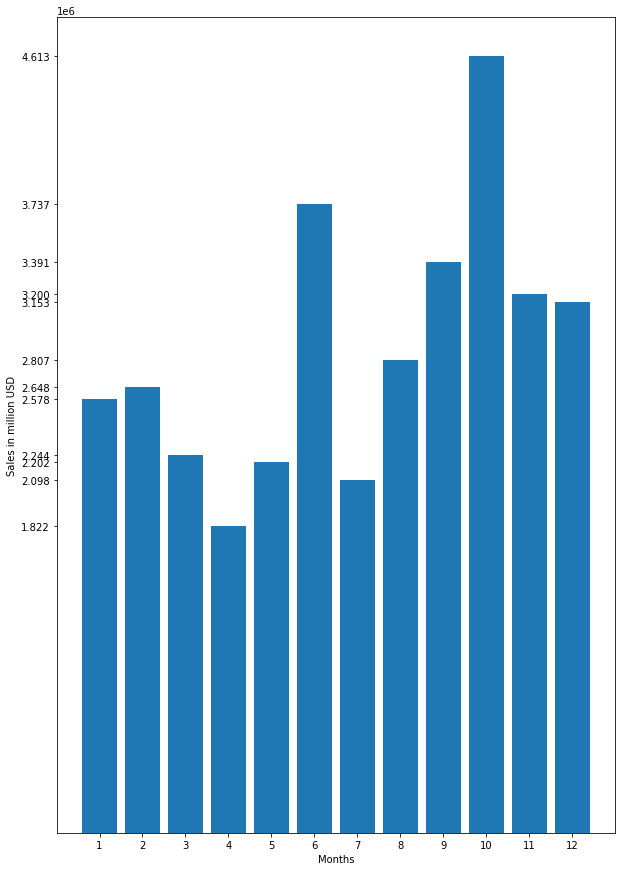

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10
                    ,15))

plt.bar(all_data['month'].unique(),all_data.groupby('month').sum()['Sales'])
plt.xlabel('Months')
plt.ylabel('Sales in million USD')
plt.xticks(all_data['month'].unique())
plt.yticks(all_data.groupby('month').sum()['Sales'])

#### Sales and quantity according to product

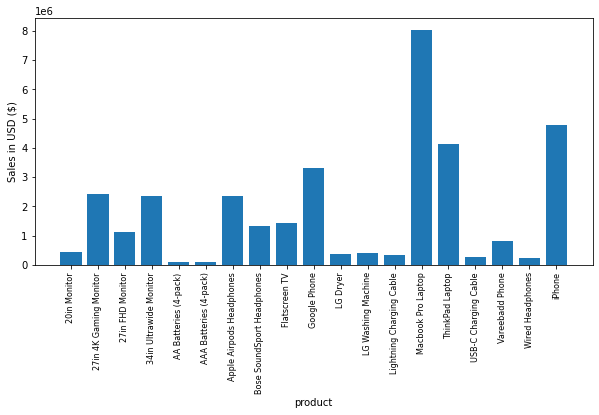

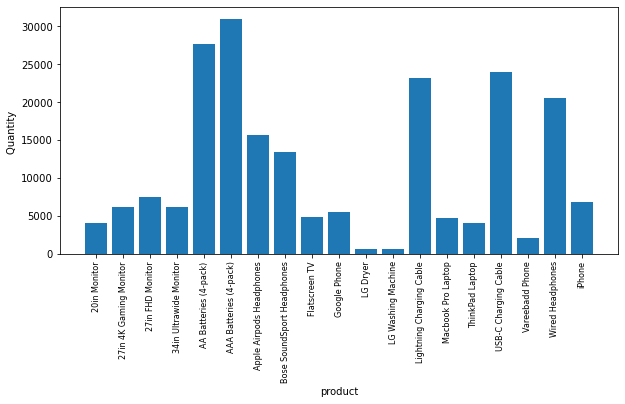

In [45]:
plt.figure(figsize=(10,10))
keys = [prod for prod, df in all_data.groupby(['Product'])]

plt.subplot(2,1,1)
plt.bar(keys,all_data.groupby(['Product']).sum()['Sales'])
plt.ylabel('Sales in USD ($)')
plt.xlabel('product')
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

plt.figure(figsize=(10,10))
plt.subplot(2,1,2)
plt.bar(keys,all_data.groupby(['Product']).sum()['Quantity Ordered'])
plt.ylabel('Quantity ')
plt.xlabel('product')
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

In [46]:
keys = [prod for prod, df in all_data.groupby(['Product'])]

In [47]:
keys

['20in Monitor',
 '27in 4K Gaming Monitor',
 '27in FHD Monitor',
 '34in Ultrawide Monitor',
 'AA Batteries (4-pack)',
 'AAA Batteries (4-pack)',
 'Apple Airpods Headphones',
 'Bose SoundSport Headphones',
 'Flatscreen TV',
 'Google Phone',
 'LG Dryer',
 'LG Washing Machine',
 'Lightning Charging Cable',
 'Macbook Pro Laptop',
 'ThinkPad Laptop',
 'USB-C Charging Cable',
 'Vareebadd Phone',
 'Wired Headphones',
 'iPhone']

In [48]:
all_data.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'month', 'Sales'],
      dtype='object')

#### Creating Address dataframe to analyse on basis of addresses of orders.

In [49]:
address = all_data[['Purchase Address','Sales']]

In [50]:
address.head()

,Purchase Address,Sales
0,"917 1st St, Dallas, TX 75001",23.900000
1,"682 Chestnut St, Boston, MA 02215",99.989998
2,"669 Spruce St, Los Angeles, CA 90001",600.000000
3,"669 Spruce St, Los Angeles, CA 90001",11.990000
4,"333 8th St, Los Angeles, CA 90001",11.990000


#### Adding state, city and street column

In [51]:
address[['Street', 'City','State']] = address['Purchase Address'].str.split(',', 2, expand=True)

C:\Users\vishw\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [52]:

address.head()

,Purchase Address,Sales,Street,City,State
0,"917 1st St, Dallas, TX 75001",23.900000,917 1st St,Dallas,TX 75001
1,"682 Chestnut St, Boston, MA 02215",99.989998,682 Chestnut St,Boston,MA 02215
2,"669 Spruce St, Los Angeles, CA 90001",600.000000,669 Spruce St,Los Angeles,CA 90001
3,"669 Spruce St, Los Angeles, CA 90001",11.990000,669 Spruce St,Los Angeles,CA 90001
4,"333 8th St, Los Angeles, CA 90001",11.990000,333 8th St,Los Angeles,CA 90001


#### Creating pincode column

In [53]:
address['PIN']=address['State'].str[-5:]


<ipython-input-53-88c365c84317>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  address['PIN']=address['State'].str[-5:]


In [54]:
address['State']=address['State'].str[:3]

<ipython-input-54-45bd9c7e9fd5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  address['State']=address['State'].str[:3]


In [55]:
address.head()

,Purchase Address,Sales,Street,City,State,PIN
0,"917 1st St, Dallas, TX 75001",23.900000,917 1st St,Dallas,TX,75001
1,"682 Chestnut St, Boston, MA 02215",99.989998,682 Chestnut St,Boston,MA,02215
2,"669 Spruce St, Los Angeles, CA 90001",600.000000,669 Spruce St,Los Angeles,CA,90001
3,"669 Spruce St, Los Angeles, CA 90001",11.990000,669 Spruce St,Los Angeles,CA,90001
4,"333 8th St, Los Angeles, CA 90001",11.990000,333 8th St,Los Angeles,CA,90001


#### Sales According to States

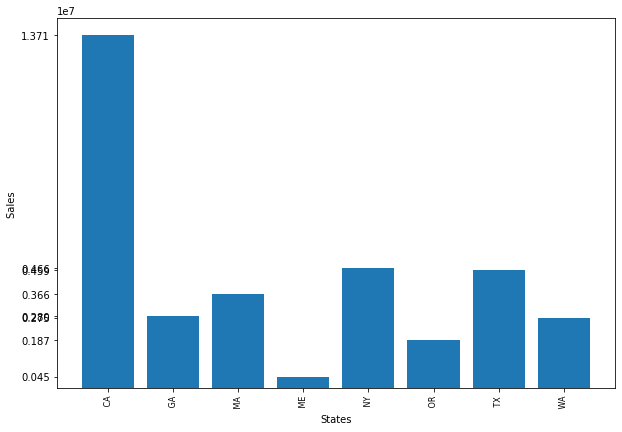

In [56]:
sts = [prod for prod, df in address.groupby(['State'])]

plt.figure(figsize=(10,15))
plt.subplot(2,1,2)
plt.bar(sts,address.groupby(['State']).sum()['Sales'])
plt.ylabel('Sales ')
plt.xlabel('States')
plt.yticks(address.groupby(['State']).sum()['Sales'])
plt.xticks(sts, rotation='vertical', size=8)
plt.show()

#### Sales Acoording to City

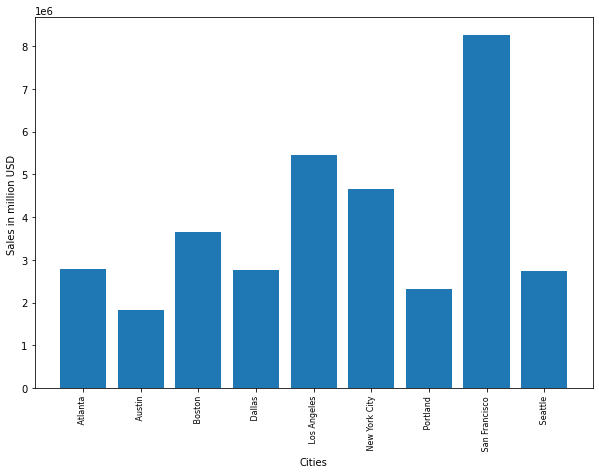

In [57]:
city = [prod for prod, df in address.groupby(['City'])]

plt.figure(figsize=(10,15))
plt.subplot(2,1,2)
plt.bar(city,address.groupby(['City']).sum()['Sales'])
plt.ylabel('Sales in million USD ')
plt.xlabel('Cities')
#plt.yticks(address.groupby(['City']).sum()['Sales'])
plt.xticks(city, rotation='vertical', size=8)
plt.show() 

#### - What time should we display advertisemens to maximize the likelihood of customer’s buying product?

In [58]:
all_data['Order Date']=pd.to_datetime(all_data['Order Date'])

In [59]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales
0,176558,USB-C Charging Cable,2,11.950000,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4.0,23.900000
1,176559,Bose SoundSport Headphones,1,99.989998,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4.0,99.989998
2,176560,Google Phone,1,600.000000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4.0,600.000000
3,176560,Wired Headphones,1,11.990000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4.0,11.990000
4,176561,Wired Headphones,1,11.990000,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4.0,11.990000


In [60]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minutes'] = all_data['Order Date'].dt.minute

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,Hour,Minutes
0,176558,USB-C Charging Cable,2,11.950000,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4.0,23.900000,8,46
1,176559,Bose SoundSport Headphones,1,99.989998,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4.0,99.989998,22,30
2,176560,Google Phone,1,600.000000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4.0,600.000000,14,38
3,176560,Wired Headphones,1,11.990000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4.0,11.990000,14,38
4,176561,Wired Headphones,1,11.990000,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4.0,11.990000,9,27


In [61]:
all_data['Hour'].value_counts()

19    12905
12    12587
11    12411
18    12280
20    12228
13    12129
14    10984
10    10944
21    10921
17    10899
16    10384
15    10175
22     8822
9      8748
23     6275
8      6256
7      4011
0      3910
6      2482
1      2350
5      1321
2      1243
4       854
3       831
Name: Hour, dtype: int64

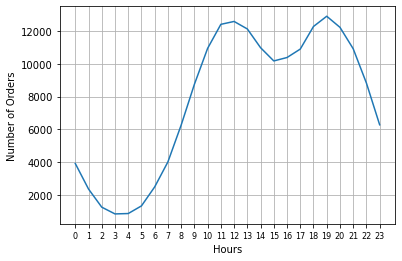

In [62]:
hrs = [hour for hour, df in all_data.groupby(['Hour'])]


plt.plot(hrs,all_data.groupby(['Hour']).count()['Order ID'])
plt.ylabel('Number of Orders')
plt.grid()
plt.xlabel('Hours')
#plt.yticks(address.groupby(['City']).sum()['Sales'])
plt.xticks(hrs, size=8)
plt.show() 

##### From Above visualizations we see that maximum orders are placed between 10 AM and 8 PM. We also see that the number of orders placed go on increasing from 4 am and decrease significantly after 8PM.
##### We can advertise in after 9am to maximise order placements 

#### - What products are most often sold together?

In [63]:
dups=all_data[all_data['Order ID'].duplicated(keep=False)]
dups.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,Hour,Minutes
2,176560,Google Phone,1,600.000000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4.0,600.000000,14,38
3,176560,Wired Headphones,1,11.990000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4.0,11.990000,14,38
17,176574,Google Phone,1,600.000000,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4.0,600.000000,19,42
18,176574,USB-C Charging Cable,1,11.950000,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4.0,11.950000,19,42
29,176585,Bose SoundSport Headphones,1,99.989998,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4.0,99.989998,11,31


In [64]:
dups.shape


(14649, 10)

In [65]:
dups['Grouped'] = dups.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

<ipython-input-65-9dc7b244e6f2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dups['Grouped'] = dups.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


In [66]:
df2 = dups[['Order ID', 'Grouped']].drop_duplicates()

In [67]:
df2.head()

,Order ID,Grouped
2,176560,"Google Phone,Wired Headphones"
17,176574,"Google Phone,USB-C Charging Cable"
29,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
31,176586,"AAA Batteries (4-pack),Google Phone"
118,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [68]:
df2['Grouped'].value_counts()[:30]

iPhone,Lightning Charging Cable                             882
Google Phone,USB-C Charging Cable                           856
iPhone,Wired Headphones                                     361
Vareebadd Phone,USB-C Charging Cable                        312
Google Phone,Wired Headphones                               303
iPhone,Apple Airpods Headphones                             286
Google Phone,Bose SoundSport Headphones                     161
Vareebadd Phone,Wired Headphones                            104
Google Phone,USB-C Charging Cable,Wired Headphones           77
Vareebadd Phone,Bose SoundSport Headphones                   60
iPhone,Lightning Charging Cable,Wired Headphones             56
Lightning Charging Cable,USB-C Charging Cable                55
Lightning Charging Cable,AA Batteries (4-pack)               52
AA Batteries (4-pack),Lightning Charging Cable               51
Lightning Charging Cable,Lightning Charging Cable            51
AAA Batteries (4-pack),USB-C Charging Ca

In [69]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


#### What product sold the most? Why do you think it sold the most?

<ipython-input-70-f6878940110f>:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


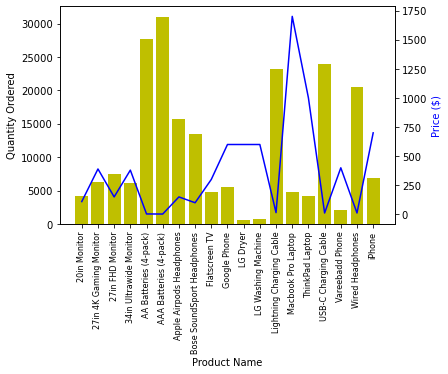

In [70]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

prices = all_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(keys, quantity_ordered, color='y')
ax2.plot(keys, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(keys, rotation='vertical', size=8)

fig.show()

#### We see from the above chart that products with low prices and which are very general products which are normally required are sold the most.